In [1]:
pip install pandas matplotlib


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.1 MB/s eta 0:00:0000:0100:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.2 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.3 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.5 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is

In [15]:
pip install numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_path = 'database.csv'
df = pd.read_csv(file_path)

In [13]:
df['Pc'] = pd.to_numeric(df['Pc'], errors='coerce')  
target_sales = 1000
total_sales_per_year = df.groupby('year')['Pc'].sum().reset_index()



In [37]:
starting_sales = total_sales_per_year['Pc'].iloc[0]
growth_rate = 0.1
target_sales = [starting_sales]
for _ in range(1, len(total_sales_per_year)):
    target_sales.append(target_sales[-1] * (1 + growth_rate))

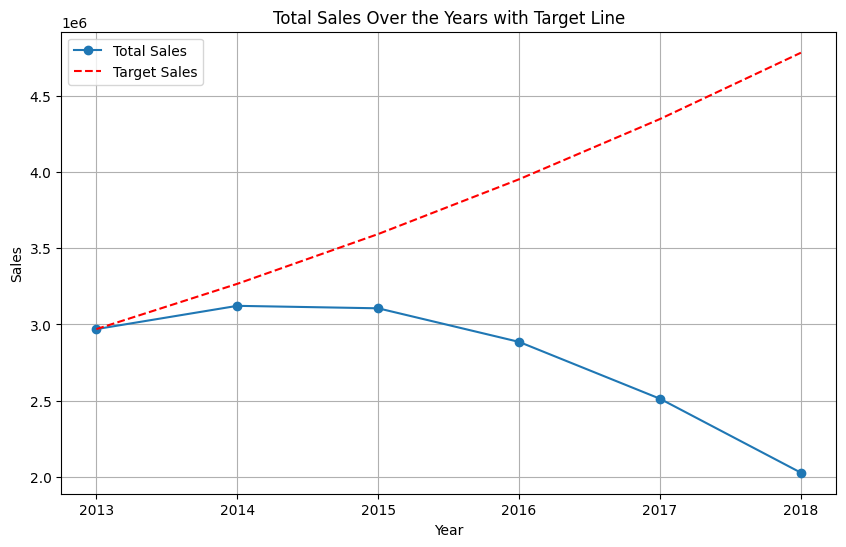

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(total_sales_per_year['year'], total_sales_per_year['Pc'], marker='o', linestyle='-', label='Total Sales')
plt.plot(total_sales_per_year['year'], target_sales, linestyle='--', color='red', label='Target Sales')
plt.title('Total Sales Over the Years with Target Line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.savefig('total_sales_chart_with_target.png')
plt.show()

Question 2.1 Please find the correlation between products in dataset (sheet data1) and explain in detail how to implement solution to find them. You can you use any tool and lib.

In [43]:
correlation_data = df.pivot_table(index='year', columns='material', values='Pc', fill_value=0)

In [44]:
correlation_matrix = correlation_data.corr() 


In [75]:
print(correlation_matrix)

material         material_000001  material_000002  material_000003  \
material                                                             
material_000001         1.000000         0.461151         0.697074   
material_000002         0.461151         1.000000         0.235033   
material_000003         0.697074         0.235033         1.000000   
material_000004         0.887510         0.505721         0.913987   
material_000005         0.730824         0.702323         0.787185   
...                          ...              ...              ...   
material_001303        -0.862817        -0.624307        -0.324155   
material_001304        -0.862817        -0.624307        -0.324155   
material_001305        -0.862817        -0.624307        -0.324155   
material_001306        -0.862817        -0.624307        -0.324155   
material_001307        -0.862817        -0.624307        -0.324155   

material         material_000004  material_000005  material_000006  \
material           

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


/opt/homebrew/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


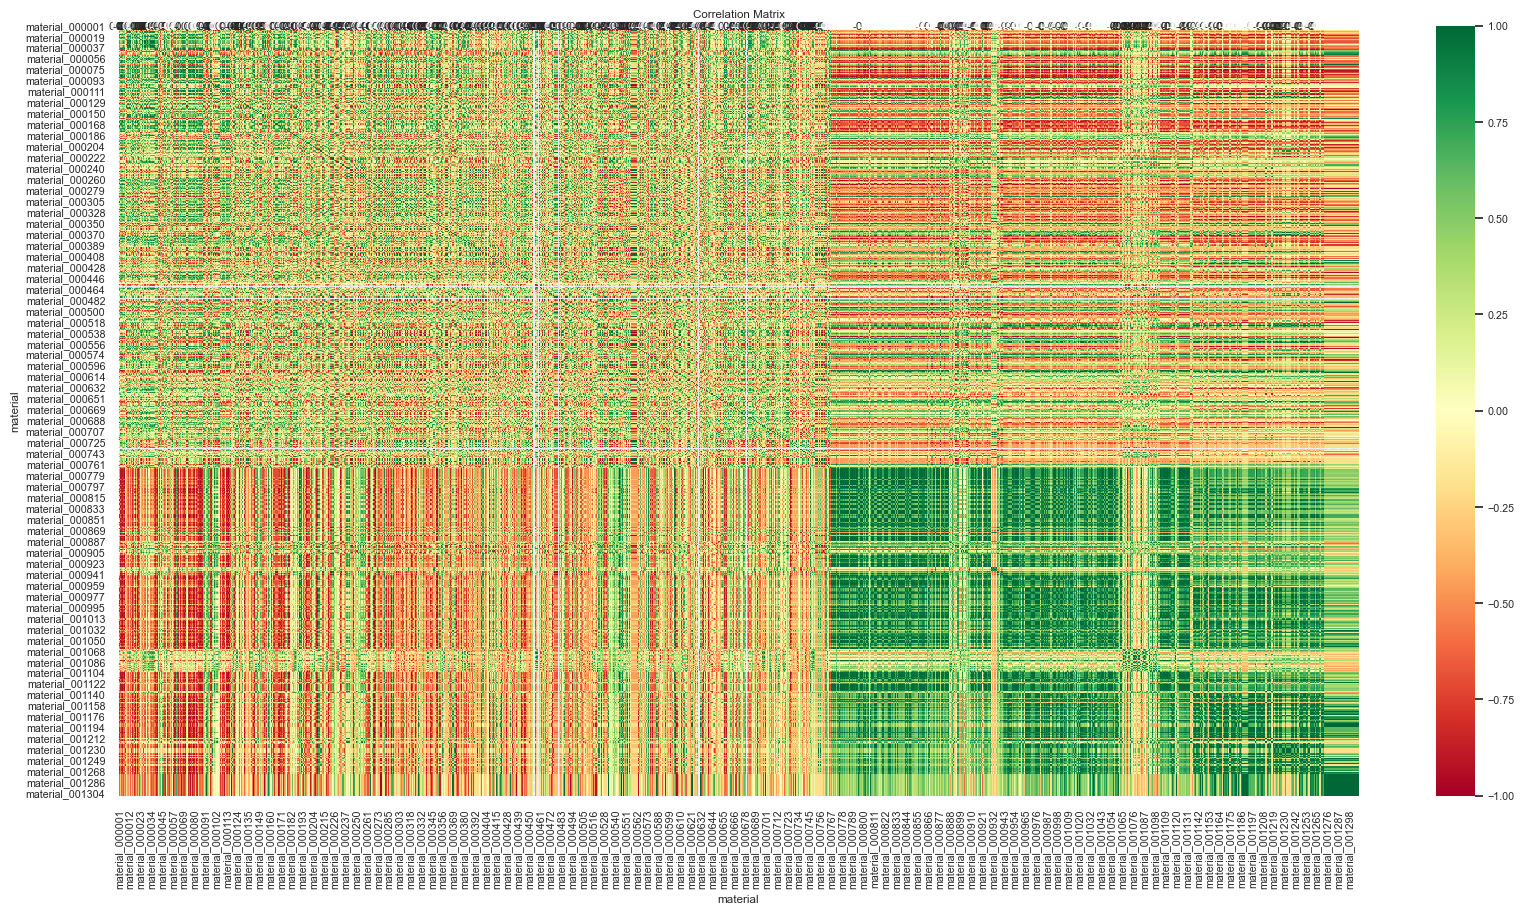

In [81]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The relationships between materials. 
Common correlation values range from -1 to 1:
Values near 1: This indicates a strong positive correlation, meaning that when one thing goes up, the other tends to go up as well. 
Values near -1: This signifies a strong negative correlation, suggesting that when one thing goes up, the other tends to go down.
Values near 0: This suggests a weak or no correlation, meaning there isn't a significant connection between the two materials. 

2.2 From question 2.1, Please find the correlation between products for Customer R44.

In [90]:
customer_data = df[df['Customer'] == 'R44']
correlation_data = customer_data.pivot_table(index='year', columns='material', values='Pc', fill_value=0)

In [91]:
correlation_matrixs = correlation_data.corr()

In [92]:
print(correlation_matrixs)

material         material_000001  material_000002  material_000003  \
material                                                             
material_000001         1.000000         0.202210         0.996443   
material_000002         0.202210         1.000000         0.152177   
material_000003         0.996443         0.152177         1.000000   
material_000004         0.991789         0.236492         0.983724   
material_000005         0.845435        -0.206572         0.844816   
...                          ...              ...              ...   
material_001274        -0.452400         0.489494        -0.486340   
material_001275        -0.452400         0.489494        -0.486340   
material_001283        -0.452400         0.489494        -0.486340   
material_001285        -0.452400         0.489494        -0.486340   
material_001286        -0.452400         0.489494        -0.486340   

material         material_000004  material_000005  material_000006  \
material           

/opt/homebrew/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


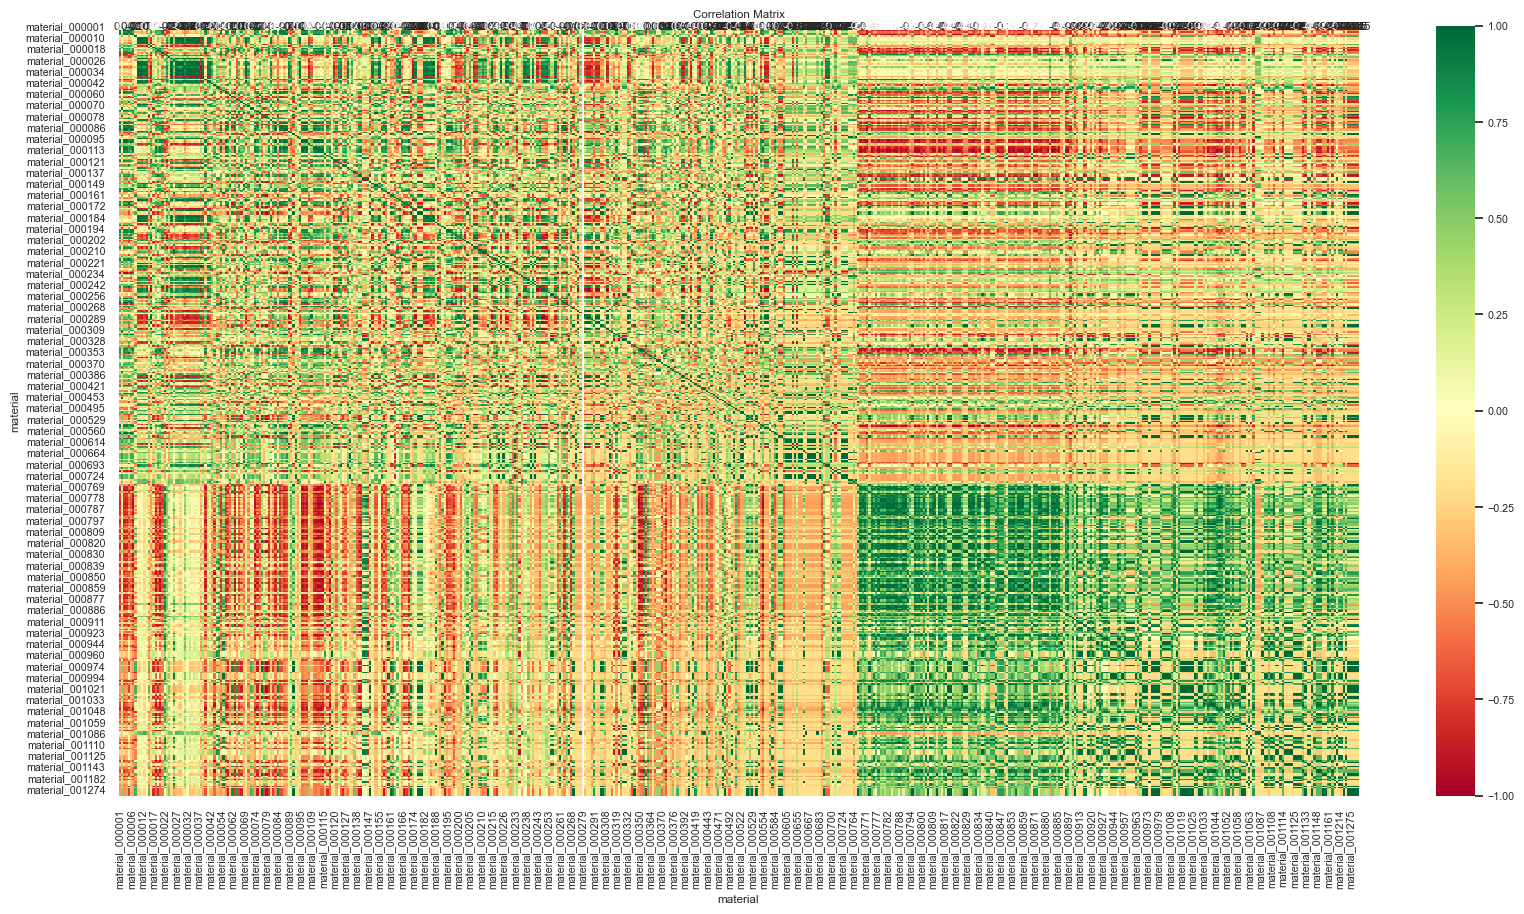

In [93]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrixs, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix for products purchased by customer R44 reveals the following insights:
Correlation values in the matrix range from -1 to 1, indicating the strength and direction of the relationships between materials.
Values close to 1: These indicate a strong positive correlation, suggesting that when the sales of one material increase, the sales of the other tend to increase as well for customer R44. 
Values close to -1: These signify a strong negative correlation, indicating that when the sales of one material go up, the sales of the other tend to decrease for customer R44. 
Values close to 0: This suggests a weak or no correlation, implying that there isn't a significant connection between the two materials in terms of sales for customer R44. 